In [1]:
import cv2
from PIL import Image
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

In [29]:
img = cv2.imread('images/img_test.png',1)

In [3]:
#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)

#What are the pixel values
print(img[0,0])



1958682
(649, 1006, 3)
uint8
[230 203 186]


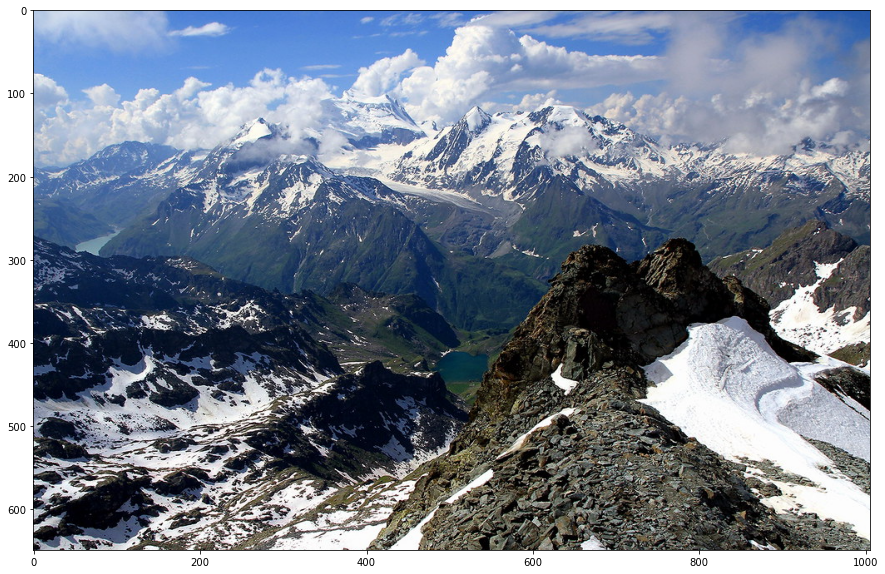

In [32]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15,30))
plt.imshow(img)

In [5]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    # if (max(img[0][0]) > 1):
        # Convert to float & normalize
    img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]

    # Convert back to int (0,255)
    img = img * 255
    img = np.uint8(img)
    
    # return Multiply image
    return img

In [6]:
# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Convert to float(0,1)
    img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])

    # Convert back to int (0,255)
    img = img * 255
    img = np.uint8(img)

    # return Multiply image
    return img

In [9]:
def blendImg(img, blendMult, blendScreen):

    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Normalize the three images
    img = img.astype("float64") / 255
    blendMult = blendMult.astype("float64") / 255
    blendScreen = blendScreen.astype("float64") / 255
    
    imgBlend = img
    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. If it is above 2/3 brightness apply mulitply.  Below 1/3 brightness apply screen. Interpolate the alpha mask.

                # Preceived brightness
                brightness = (img[y,x,0] * 0.2126) + (img[y,x,1] * 0.7152) + (img[y,x,2] * 0.0722)
                
                # brightness = (img[y,x,0] + img[y,x,1] + img[y,x,2]) / 3   
                
                # Brightness cut off for applying Multiply to highlights and Screen to shadows
                cutOffHigh = 2/3
                cutOffLow = 1/3
                
                if(brightness > cutOffHigh):
                    alpha = np.interp(brightness,[cutOffHigh,1],[0,1])
                    imgBlend[y,x,z] = (img[y,x,z] * (1-alpha)) + (blendMult[y,x,z] * (alpha))
                if(brightness < cutOffLow):
                    alpha = np.interp(brightness,[0,cutOffLow],[1,0])
                    imgBlend[y,x,z] = (img[y,x,z] * (1-alpha)) + (blendScreen[y,x,z] * (alpha))
                
    # Convert back to int (0,255)
    imgBlend = imgBlend * 255
    imgBlend = np.uint8(imgBlend)

    return imgBlend

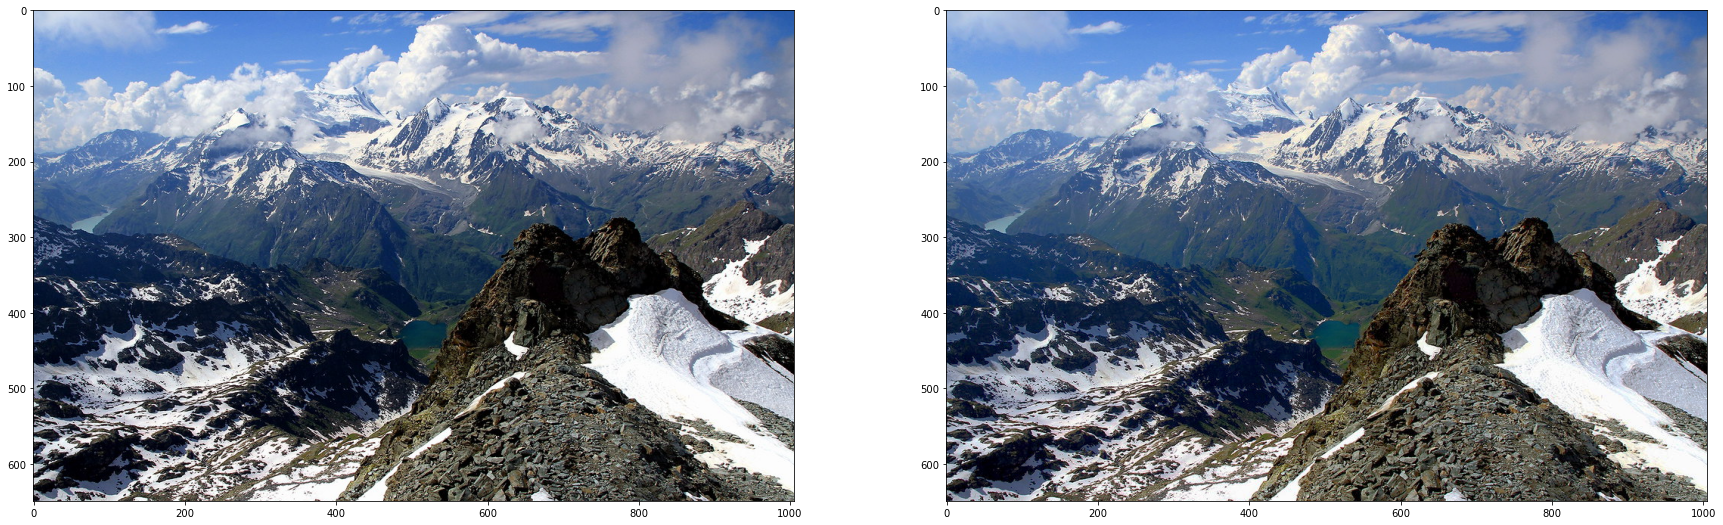

In [25]:
# Create the muliply and screen images
img1 = multiply(img)
img2 = screen(img)

# Blend images.
blended = blendImg(img, img1, img2)

# Show and save image
fig = plt.figure(figsize = (30,60))
columns = 2
rows = 1
fig.add_subplot(rows,columns, 1)
plt.imshow(img)
fig.add_subplot(rows,columns, 2)
plt.imshow(blended)
plt.show()



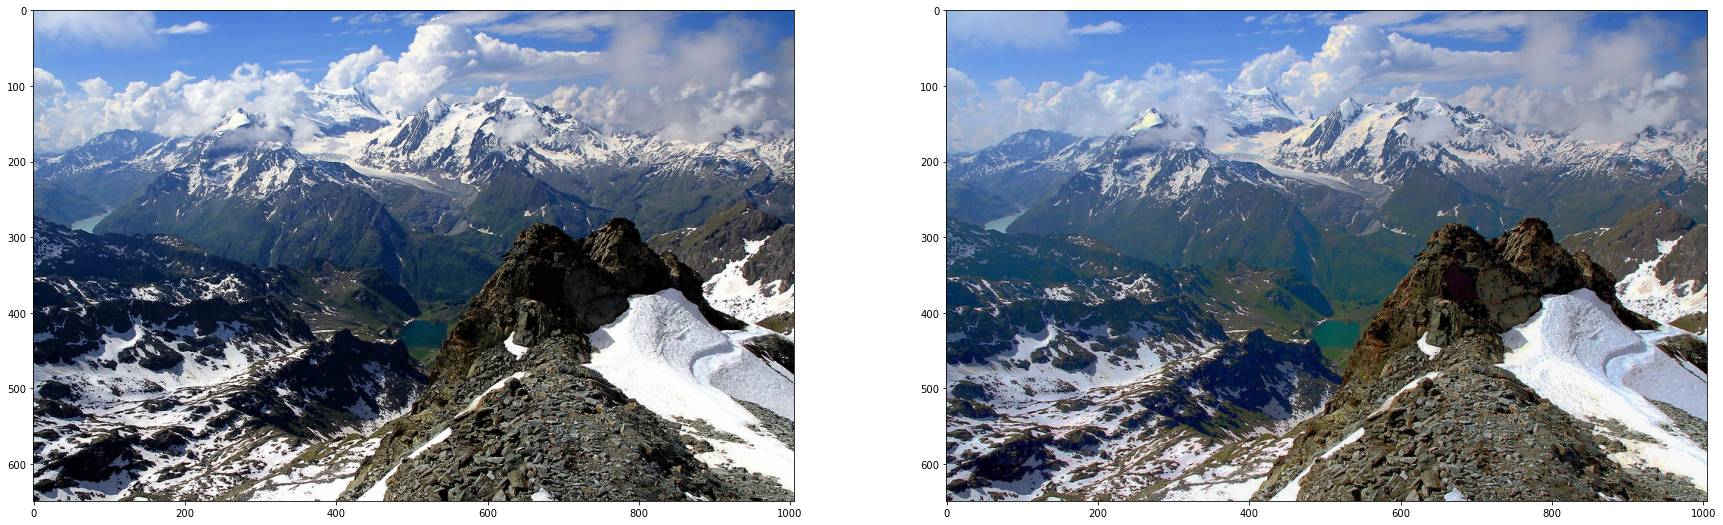

True

In [26]:
# Create the muliply and screen images
img1 = multiply(blended)
img2 = screen(blended)

# Blend images.
blended = blendImg(img, img1, img2)

# Show and save image
fig = plt.figure(figsize = (30,60))
columns = 2
rows = 1
fig.add_subplot(rows,columns, 1)
plt.imshow(img)
fig.add_subplot(rows,columns, 2)
plt.imshow(blended)
plt.show()

cv2.imwrite('test1.png', cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))

In [ ]:
# def blendImg(img, blendMult, blendScreen):
#     # Get the size of the image
#     h = img.shape[0]
#     w = img.shape[1]
#     d = img.shape[2]

#     # Check if image is normalized between 0 - 1.
#     # if (max(img[0][0]) > 1):
#         # Convert to float & normalize
#     img = img.astype("float64") / 255
#     blendMult = blendMult.astype("float64") / 255

    

#     # Apply the Filter
#     for y in range(0,h):
#         #Search each pixel in the row. x = pixel
#         for x in range(0,w):
#             #Search each RGB value.
#             for z in range(0,d):
#                 # Apply Filter to seperate image. If it is above 2/3 brightness apply mulitply.  Below 1/3 brightness apply screen. Interpolate the alpha mask.
#                 brightness = (img[y,x,0] * 0.2126) + (img[y,x,1] * 0.7152) + (img[y,x,z] * 0.0722)
#                 # brightness = (img[y,x,0] + img[y,x,1] + img[y,x,z]) / 3   
#                 cutOffHigh = (1 - 1/4)
#                 cutOffLow = 1/4
#                 if(brightness < cutOffHigh):
#                     # alpha = np.interp(brightness,[0, 1],[1,0])
#                     blendMult[y,x,z] = (img[y,x,z] * (1-brightness)) + (blendMult[y,x,z] * brightness)
#                     # img[y,x,z] = max(img[y,x,z],0.01)
#                 # elif(brightness )
#                     # img[y,x,z] = min(img[y,x,z],0.99)


#     return blendMult
